In [156]:
import json
import pandas as pd
import glob
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import os
import sys

sys.path.append("/mnt/d/xFootball/SoccermaticsForPython/")#os.getcwd() + '/modules')
from config import STATSBOMB_DATA
!pwd

/mnt/d/xFootball/SoccermaticsForPython/notebooks


# competitions and matches

In [12]:
competitions = pd.read_json(f"{STATSBOMB_DATA}/competitions.json")
competitions.query("country_name=='International' and competition_gender=='male'")
# so we are looking at id '43'

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
18,43,3,International,FIFA World Cup,male,2018,2020-07-29T05:00,2020-07-29T05:00


In [26]:
# load the matrches of WC18
# load FRA match data for mens world cup: #competition id 43
matches = pd.DataFrame()
for MATCH_FILE in glob.glob(f'{STATSBOMB_DATA}/matches/43/*'):
    # matches = pd.concat([matches, pd.read_json(MATCH_FILE)])
    matches = pd.concat([matches, pd.json_normalize(json.load(open(MATCH_FILE)), sep='_')])
    
matches.sample(3)

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_competition_id,competition_country_name,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
35,7553,2018-06-23,17:00:00.000,1,2,available,2020-07-29T05:00,2,43,International,...,10,Group Stage,256.0,Rostov Arena,188.0,Russia,727.0,M. Mažić,NaN,NaN
32,7532,2018-06-16,18:00:00.000,0,1,available,2020-07-29T05:00,1,43,International,...,10,Group Stage,4259.0,Mordovia Arena,188.0,Russia,736.0,B. Gassama,NaN,NaN
16,7535,2018-06-17,14:00:00.000,0,1,available,2020-07-29T05:00,1,43,International,...,10,Group Stage,254.0,Samara Arena,188.0,Russia,732.0,M. Diedhiou,NaN,NaN


In [29]:
matches_FRA = matches[(matches['home_team_country_name'] == 'France') | (matches['away_team_country_name'] == 'France')].sort_values('match_date')
matches_FRA

,match_id,match_date,kick_off,home_score,away_score,match_status,last_updated,match_week,competition_competition_id,competition_country_name,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
11,7530,2018-06-16,12:00:00.000,2,1,available,2020-07-29T05:00,1,43,International,...,10,Group Stage,4258.0,Kazan' Arena (Kazan'),188.0,Russia,734.0,A. Cunha,NaN,NaN
17,7546,2018-06-21,17:00:00.000,1,0,available,2020-07-29T05:00,2,43,International,...,10,Group Stage,4261.0,Ekaterinburg Arena,188.0,Russia,737.0,Mohamed Abdulla Hassan Mohd,NaN,NaN
27,7563,2018-06-26,16:00:00.000,0,0,available,2020-07-29T05:00,3,43,International,...,10,Group Stage,255.0,Stadion Luzhniki,188.0,Russia,738.0,Sandro Ricci,NaN,NaN
21,7580,2018-06-30,21:00:00.000,4,3,available,2020-07-29T05:00,4,43,International,...,33,Round of 16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,8649,2018-07-06,16:00:00.000,0,2,available,2020-07-29T05:00,5,43,International,...,11,Quarter-finals,4263.0,Stadion Nizhny Novgorod,188.0,Russia,730.0,N. Pitana,NaN,NaN
60,8655,2018-07-10,20:00:00.000,1,0,available,2020-07-29T05:00,6,43,International,...,15,Semi-finals,4726.0,Saint-Petersburg Stadium,255.0,International,734.0,A. Cunha,NaN,NaN
24,8658,2018-07-15,17:00:00.000,4,2,available,2020-07-29T05:00,7,43,International,...,26,Final,255.0,Stadion Luzhniki,188.0,Russia,730.0,N. Pitana,NaN,NaN


In [52]:
match_id='8658'
pd.read_json(f"{STATSBOMB_DATA}/events/{match_id}.json").head(10).T

,0,1,2,3,4,5,6,7,8,9
id,47638847-fd43-4656-b49c-cff64e5cfc0a,0c04305d-5615-4520-9be5-7c232829954b,c5e17439-efe2-480b-9cff-1600998674d7,7e1460eb-c572-4059-8cd4-cec4857f818d,918ffaaf-3cee-41e5-87e2-4bcc8d43a859,329cb470-9b7a-4b19-b8d2-50fa902295af,b444aac0-e2c3-495c-ac63-dad635e4ffda,028c24b1-ea60-41d4-aa74-9275471cdda6,d91b85db-797c-4746-8efe-6f74c4f8c69f,1a3cda1b-1796-4126-855e-8af1d9fdb4b1
index,1,2,3,4,5,6,7,8,9,10
period,1,1,1,1,1,1,1,1,1,1
timestamp,2020-09-08 00:00:00,2020-09-08 00:00:00,2020-09-08 00:00:00,2020-09-08 00:00:00,2020-09-08 00:00:00.400000,2020-09-08 00:00:01.559000,2020-09-08 00:00:01.559000,2020-09-08 00:00:02.347000,2020-09-08 00:00:02.919000,2020-09-08 00:00:03.120000
minute,0,0,0,0,0,0,0,0,0,0
second,0,0,0,0,0,1,1,2,2,3
type,"{'id': 35, 'name': 'Starting XI'}","{'id': 35, 'name': 'Starting XI'}","{'id': 18, 'name': 'Half Start'}","{'id': 18, 'name': 'Half Start'}","{'id': 30, 'name': 'Pass'}","{'id': 42, 'name': 'Ball Receipt*'}","{'id': 43, 'name': 'Carry'}","{'id': 30, 'name': 'Pass'}","{'id': 17, 'name': 'Pressure'}","{'id': 42, 'name': 'Ball Receipt*'}"
possession,1,1,1,1,2,2,2,2,2,2
possession_team,"{'id': 771, 'name': 'France'}","{'id': 771, 'name': 'France'}","{'id': 771, 'name': 'France'}","{'id': 771, 'name': 'France'}","{'id': 785, 'name': 'Croatia'}","{'id': 785, 'name': 'Croatia'}","{'id': 785, 'name': 'Croatia'}","{'id': 785, 'name': 'Croatia'}","{'id': 785, 'name': 'Croatia'}","{'id': 785, 'name': 'Croatia'}"
play_pattern,"{'id': 1, 'name': 'Regular Play'}","{'id': 1, 'name': 'Regular Play'}","{'id': 1, 'name': 'Regular Play'}","{'id': 1, 'name': 'Regular Play'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 9, 'name': 'From Kick Off'}","{'id': 9, 'name': 'From Kick Off'}"


In [53]:
# match_id = '7530'
match = pd.json_normalize(json.load(open(f"{STATSBOMB_DATA}/events/{match_id}.json")), sep='_')
match.sample(3).T

,715,224,295
id,53f5d436-2d4e-4df4-afbe-de1391391c7c,78c9569c-d8a8-4c23-afd4-13a6d8bf3c59,e2c6af8f-67ef-4205-8559-45d64eac0c74
index,716,225,296
period,1,1,1
timestamp,00:19:47.547,00:04:42.840,00:06:42.640
minute,19,4,6
...,...,...,...
dribble_overrun,NaN,NaN,NaN
substitution_outcome_id,NaN,NaN,NaN
substitution_outcome_name,NaN,NaN,NaN
substitution_replacement_id,NaN,NaN,NaN


In [41]:
for col in match.columns:print (col)

id
index
period
timestamp
minute
second
possession
duration
type_id
type_name
possession_team_id
possession_team_name
play_pattern_id
play_pattern_name
team_id
team_name
tactics_formation
tactics_lineup
related_events
location
player_id
player_name
position_id
position_name
pass_recipient_id
pass_recipient_name
pass_length
pass_angle
pass_height_id
pass_height_name
pass_end_location
pass_body_part_id
pass_body_part_name
pass_type_id
pass_type_name
carry_end_location
pass_switch
pass_outcome_id
pass_outcome_name
under_pressure
ball_receipt_outcome_id
ball_receipt_outcome_name
duel_type_id
duel_type_name
pass_aerial_won
pass_assisted_shot_id
pass_shot_assist
shot_statsbomb_xg
shot_end_location
shot_key_pass_id
shot_type_id
shot_type_name
shot_body_part_id
shot_body_part_name
shot_outcome_id
shot_outcome_name
shot_technique_id
shot_technique_name
shot_freeze_frame
goalkeeper_type_id
goalkeeper_type_name
goalkeeper_outcome_id
goalkeeper_outcome_name
goalkeeper_body_part_id
goalkeeper_body_

In [54]:
match.type_name.value_counts()

Pass                 846
Ball Receipt*        747
Carry                617
Pressure             254
Ball Recovery         88
Duel                  53
Clearance             37
Camera On             34
Block                 33
Miscontrol            33
Goal Keeper           32
Foul Committed        28
Dribble               28
Foul Won              27
Dispossessed          27
Shot                  23
Dribbled Past         18
Interception          17
Injury Stoppage        6
Camera off             5
Substitution           5
Half End               4
Half Start             4
Referee Ball-Drop      2
Starting XI            2
Shield                 2
Error                  1
Player On              1
Own Goal Against       1
Tactical Shift         1
Player Off             1
Own Goal For           1
Name: type_name, dtype: int64

In [62]:
match.query("team_name=='France'").groupby('player_name').type_name.value_counts().to_frame()
pd.crosstab(match.query("team_name=='France'")['player_name'],match.query("team_name=='France'")['type_name'])

type_name,Ball Receipt*,Ball Recovery,Block,Carry,Clearance,Dispossessed,Dribble,Dribbled Past,Duel,Error,...,Goal Keeper,Interception,Miscontrol,Pass,Player Off,Player On,Pressure,Shield,Shot,Substitution
player_name,,,,,,,,,,,,,,,,,,,,,
Antoine Griezmann,31,6,4,25,1,3,4,2,2,0,...,0,0,4,27,0,0,31,0,2,0
Benjamin Pavard,15,3,2,15,6,0,0,1,2,0,...,0,1,0,28,0,0,6,0,0,0
Blaise Matuidi,19,4,0,17,0,1,0,1,6,0,...,0,1,0,24,0,0,24,0,0,1
Corentin Tolisso,3,0,0,3,0,0,0,1,0,0,...,0,0,0,5,0,0,6,0,0,0
Hugo Lloris,5,4,0,14,0,0,1,0,0,1,...,24,0,0,27,0,0,0,0,0,0
Kylian Mbappé Lottin,25,5,3,24,0,3,6,0,2,0,...,0,0,4,16,0,0,6,0,2,0
Lucas Hernández Pi,17,2,1,17,3,1,2,0,1,0,...,0,3,0,32,0,0,11,1,0,0
"N""Golo Kanté",12,3,1,13,0,2,0,2,1,0,...,0,1,1,11,0,0,19,0,0,1
Nabil Fekir,6,1,1,8,0,1,2,0,0,0,...,0,0,0,4,0,0,5,0,1,0


In [66]:
receipts = match.query("player_name=='Olivier Giroud' & type_name=='Ball Receipt*'")
receipts.dropna(axis=1).head()

,id,index,period,timestamp,minute,second,possession,type_id,type_name,possession_team_id,...,play_pattern_id,play_pattern_name,team_id,team_name,related_events,location,player_id,player_name,position_id,position_name
104,f52dcb98-3cf6-488d-b19d-93ba721de7ca,105,1,00:01:42.880,1,42,5,42,Ball Receipt*,771,...,1,Regular Play,771,France,[ae49795d-e9d3-4fce-b196-103c5a62d5cb],"[69.0, 26.0]",3604.0,Olivier Giroud,24.0,Left Center Forward
108,18b3d74d-7c49-446f-9c49-3abcad6ec4c1,109,1,00:01:45.440,1,45,5,42,Ball Receipt*,771,...,1,Regular Play,771,France,[39ca8d7a-2a51-4239-9b0d-ff23f69ea881],"[61.0, 31.0]",3604.0,Olivier Giroud,24.0,Left Center Forward
209,15b8c426-dd10-4e2b-9d90-3030d951fb3c,210,1,00:04:26.547,4,26,12,42,Ball Receipt*,771,...,1,Regular Play,771,France,[2425cc7a-5a35-42b6-ae80-461bd4675c19],"[53.0, 22.0]",3604.0,Olivier Giroud,24.0,Left Center Forward
344,c826039b-e4a5-4bf9-a93b-3ef2142ad768,345,1,00:08:51.747,8,51,23,42,Ball Receipt*,771,...,3,From Free Kick,771,France,[831a3b06-ba62-452e-bb72-4a91ae1de48a],"[94.0, 43.0]",3604.0,Olivier Giroud,24.0,Left Center Forward
442,a4c6fdc3-f80a-422d-957c-1c6259e51207,443,1,00:11:20.266,11,20,26,42,Ball Receipt*,771,...,7,From Goal Kick,771,France,[1aecc1de-47f4-4022-af5e-07994beebaa6],"[76.0, 49.0]",3604.0,Olivier Giroud,24.0,Left Center Forward


In [67]:
receipts.location

104      [69.0, 26.0]
108      [61.0, 31.0]
209      [53.0, 22.0]
344      [94.0, 43.0]
442      [76.0, 49.0]
523     [104.0, 59.0]
645     [103.0, 45.0]
713      [45.0, 10.0]
726      [79.0, 39.0]
833      [66.0, 24.0]
844       [64.0, 4.0]
862       [76.0, 4.0]
920     [111.0, 62.0]
996       [34.0, 4.0]
1007      [55.0, 3.0]
1081     [75.0, 60.0]
1272     [97.0, 47.0]
1400     [99.0, 58.0]
1468     [68.0, 48.0]
1547     [73.0, 55.0]
1840      [36.0, 4.0]
1910    [113.0, 74.0]
2149    [106.0, 31.0]
2295     [95.0, 27.0]
2341     [26.0, 49.0]
2373    [103.0, 14.0]
2478     [45.0, 69.0]
Name: location, dtype: object

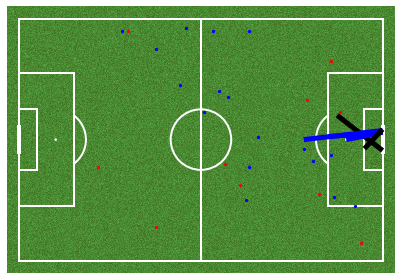

In [97]:
# plot Grioud's ball receipts in one match
from mplsoccer.pitch import Pitch
%matplotlib inline
pitch = Pitch(pitch_color='grass', line_color='white', stripe=False)
fig, ax = pitch.draw()
# Plot the receipts
color =  lambda x: 'blue' if x==1 else 'red'
for row in receipts.itertuples():
    sc1 = pitch.scatter(row.location[0], row.location[1], s=5, c=color(row.period), label='receipt', ax=ax)
for row in match.loc[(match.shot_outcome_name=='Goal' )| (match.type_name.str.contains('Own Goal Against'))].itertuples():
    # pitch.scatter(row.location[0], row.location[1], s=10, c='black', label='receipt', ax=ax)
    try:
        color = 'black' if row.possession_team_name=='Croatia' else 'blue'
        line = pitch.lines(row.location[0], row.location[1],
                   row.shot_end_location[0], row.shot_end_location[1], comet=False, label='shot', color=color, ax=ax)
    except:
        pass



In [106]:
match.loc[(match.shot_outcome_name=='Goal' )| (match.type_name.str.contains('Own Goal Against'))].dropna(axis=1)#[['location','shot_end_location','possesion_team_name']]

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,play_pattern_id,play_pattern_name,team_id,team_name,related_events,location,player_id,player_name,position_id,position_name
677,bd8965e2-ae86-4f94-865c-b6a6e4ef8828,678,1,00:17:56.987,17,56,39,0.000,20,Own Goal Against,...,3,From Free Kick,785,Croatia,[3c22c707-0d4d-4ef9-b99f-e76ad1258f03],"[8.0, 42.0]",5472.0,Mario Mandžukić,23.0,Center Forward
910,dd524196-386d-4759-b40b-e920cc77b059,911,1,00:27:53.880,27,53,58,0.587,16,Shot,...,3,From Free Kick,785,Croatia,[c0291f7e-a0c0-43c9-8bd3-a60120fdc946],"[105.0, 32.0]",5474.0,Ivan Perišić,21.0,Left Wing
1052,ad19fde7-da37-4430-b1a3-2293ae7c4fff,1053,1,00:37:56.787,37,56,73,0.533,16,Shot,...,5,Other,771,France,[826b19b4-3677-4476-bbd3-fededea1d302],"[108.0, 40.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward
1862,1ff32d30-cf80-4775-997f-0841694c6069,1863,2,00:13:33.907,58,33,120,1.053,16,Shot,...,4,From Throw In,771,France,[81662547-2624-4359-bd04-503deaf11ffa],"[102.0, 39.0]",20004.0,Paul Pogba,9.0,Right Defensive Midfield
2059,a8692197-bb35-453d-9191-fe7daa25f8df,2060,2,00:19:36.707,64,36,128,0.933,16,Shot,...,1,Regular Play,771,France,[e963fbd5-e52d-40a7-bef0-02edd6de28b5],"[94.0, 40.0]",3009.0,Kylian Mbappé Lottin,12.0,Right Midfield
2170,1b5307e5-c1c7-4017-ba64-477e2b5cc2c1,2171,2,00:23:08.107,68,8,136,0.680,16,Shot,...,1,Regular Play,785,Croatia,[35511227-33d2-4ed7-a8ea-f1d9fd3660dd],"[114.0, 43.0]",5472.0,Mario Mandžukić,23.0,Center Forward


In [93]:
match.loc[910].dropna()

id                                   dd524196-386d-4759-b40b-e920cc77b059
index                                                                 911
period                                                                  1
timestamp                                                    00:27:53.880
minute                                                                 27
second                                                                 53
possession                                                             58
duration                                                            0.587
type_id                                                                16
type_name                                                            Shot
possession_team_id                                                    785
possession_team_name                                              Croatia
play_pattern_id                                                         3
play_pattern_name                     

In [296]:
# get all france matches
matches = pd.DataFrame()
for matchID in matches_FRA.match_id:
    match = pd.json_normalize(json.load(open(f"{STATSBOMB_DATA}/events/{matchID}.json")), sep='_')
    match['match_id'] = matchID
    matches = pd.concat([matches,match.reset_index(drop=True)]).reset_index(drop=True)
    print (matches.shape)
matches.reset_index(drop=True).index

(3473, 109)
(7215, 115)
(10820, 116)
(14369, 119)
(17745, 120)
(21099, 120)
(24077, 120)


RangeIndex(start=0, stop=24077, step=1)

In [295]:
matches.reset_index(drop=True).index

RangeIndex(start=0, stop=24077, step=1)

In [168]:
# get event ids that have giroud receiving the ball
receipts = matches.query("player_name=='Olivier Giroud' & type_name=='Ball Receipt*'")
passes = matches.query("player_name=='Olivier Giroud' & type_name=='Pass'")
passes.dropna(axis=1).sample(5)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,location,player_id,player_name,position_id,position_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,match_id
732,38e31d48-1252-41f0-8b24-d949b1613d81,733,1,00:19:09.500,19,9,37,1.073,30,Pass,771,France,4,From Throw In,771,France,"[62.0, 4.0]",3604.0,Olivier Giroud,23.0,Center Forward,3.000000,0.000000,3.0,High Pass,"[65.0, 4.0]",8649
701,d31ed1ae-f9eb-47b0-ad76-b2c455156903,702,1,00:15:43.480,15,43,26,2.200,30,Pass,771,France,7,From Goal Kick,771,France,"[72.0, 41.0]",3604.0,Olivier Giroud,23.0,Center Forward,10.630146,0.718830,2.0,Low Pass,"[80.0, 48.0]",8655
2867,8d0887ed-87d2-411a-b7ae-e7077db17550,2868,2,00:34:31.520,79,31,156,1.867,30,Pass,771,France,1,Regular Play,771,France,"[80.0, 34.0]",3604.0,Olivier Giroud,23.0,Center Forward,18.027756,1.515298,3.0,High Pass,"[81.0, 52.0]",8649
1736,e56d25b2-8158-4a58-8576-a5b19dcd2d9f,1737,2,00:00:16.840,45,16,100,1.240,30,Pass,771,France,9,From Kick Off,771,France,"[67.0, 63.0]",3604.0,Olivier Giroud,23.0,Center Forward,10.049875,-1.471128,1.0,Ground Pass,"[68.0, 53.0]",8649
1262,6f4b7e78-a32c-4aab-89e0-a183a5dfc028,1263,1,00:31:59.693,31,59,61,0.959,30,Pass,771,France,1,Regular Play,771,France,"[66.0, 28.0]",3604.0,Olivier Giroud,23.0,Center Forward,17.000000,0.000000,2.0,Low Pass,"[83.0, 28.0]",8649


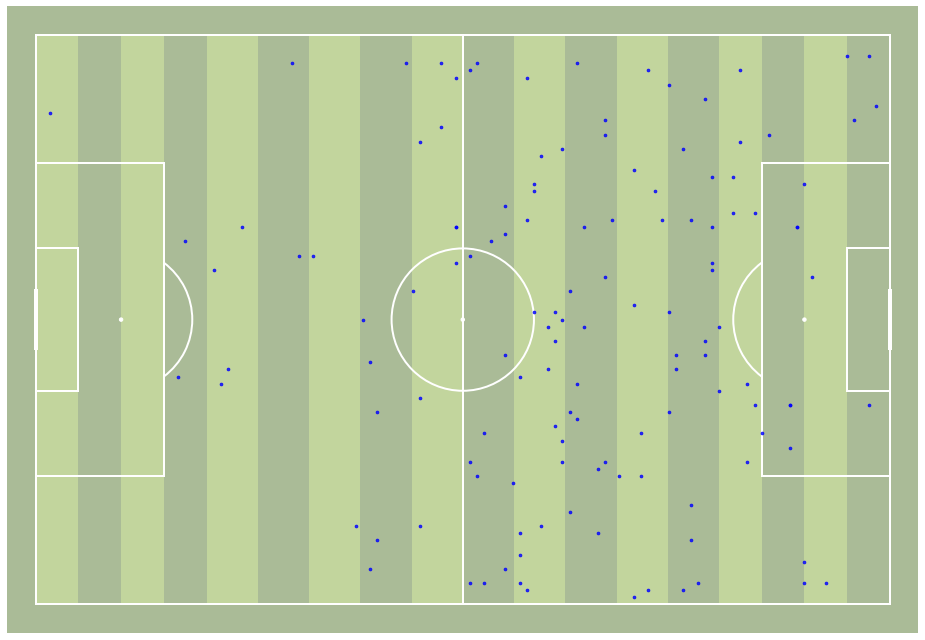

In [169]:
# plot Grioud's ball receipts
from mplsoccer.pitch import Pitch
%matplotlib inline
pitch = Pitch(pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True,figsize=(16, 9))
fig, ax = pitch.draw()
# Plot the receipts
color =  lambda x: 'blue' if x!="Incomplete" else 'red'
for row in passes.itertuples():
    sc1 = pitch.scatter(row.location[0], row.location[1], s=7, alpha=0.8, c=color(row.ball_receipt_outcome_name) , ax=ax)
# for row in match.loc[(match.shot_outcome_name=='Goal' )| (match.type_name.str.contains('Own Goal Against'))].itertuples():
#     # pitch.scatter(row.location[0], row.location[1], s=10, c='black', label='receipt', ax=ax)
#     try:
#         color = 'black' if row.possession_team_name=='Croatia' else 'blue'
#         line = pitch.lines(row.location[0], row.location[1],
#                    row.shot_end_location[0], row.shot_end_location[1], comet=False, label='shot', color=color, ax=ax)
#     except:
#         pass
# ax.legend()


In [129]:
# get all france matches
# get event ids that have giroud receiving the ball
# plot them
# notice the time in match and game-state
# check how his receives follow thru - shot in next 5 events? final third entry in next 5? possession break? may be a classification

print (matches_FRA.apply(lambda row: f"{row.match_id}==>{row.home_team_home_team_name} {row.home_score}:{row.away_score} {row.away_team_away_team_name}", axis=1))



11    7530==>France 2:1 Australia
17         7546==>France 1:0 Peru
27      7563==>Denmark 0:0 France
21    7580==>France 4:3 Argentina
23      8649==>Uruguay 0:2 France
60      8655==>France 1:0 Belgium
24      8658==>France 4:2 Croatia
dtype: object


In [297]:
matches.query("pass_recipient_name=='Olivier Giroud'")

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,under_pressure,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,counterpress,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_backheel,shot_first_time,foul_committed_advantage,foul_won_advantage,foul_won_defensive,pass_cross,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_through_ball,pass_technique_id,pass_technique_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,shot_deflected,block_deflection,dribble_nutmeg,dribble_overrun,ball_recovery_recovery_failure,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain,foul_committed_offensive,foul_committed_penalty,foul_won_penalty,foul_committed_type_id,foul_committed_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_aerial_won,pass_deflected,match_id,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,pass_cut_back,ball_recovery_offensive,block_offensive,pass_miscommunication,pass_goal_assist,shot_redirect,miscontrol_aerial_won
2576,1dfc6850-dc17-452b-9679-c3aed75b2602,2577,2,00:26:27.653,71,27,124,1.987,30,Pass,771,France,1,Regular Play,771,France,NaN,NaN,"[111fb081-5ae8-44ce-9798-d37a0f8e90a3, a04cb3d...","[70.0, 14.0]",20004.0,Paul Pogba,15.0,Left Center Midfield,3604.0,Olivier Giroud,36.769554,0.390607,3.0,High Pass,"[104.0, 28.0]",40.0,Right Foot,NaN,NaN,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2801,7802a6a6-9e6e-4a16-8c30-6c0c671c80b0,2802,2,00:32:11.600,77,11,140,3.080,30,Pass,792,Australia,1,Regular Play,771,France,NaN,NaN,[a40a4e10-6dfc-4614-9f01-d81d1b0344cd],"[24.0, 32.0]",5480.0,Corentin Tolisso,13.0,Right Center Midfield,3604.0,Olivier Giroud,38.587563,-0.544864,3.0,High Pass,"[57.0, 12.0]",38.0,Left Foot,66.0,Recovery,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2840,4882886f-3be9-4f4c-9a45-2a964d1d59a4,2841,2,00:33:11.520,78,11,141,2.360,30,Pass,771,France,1,Regular Play,771,France,NaN,NaN,"[1975541a-9690-485a-8521-7bdd66a7707e, 4a631a6...","[62.0, 72.0]",5485.0,Raphaël Varane,3.0,Right Center Back,3604.0,Olivier Giroud,43.382023,-0.453339,3.0,High Pass,"[101.0, 53.0]",40.0,Right Foot,NaN,NaN,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

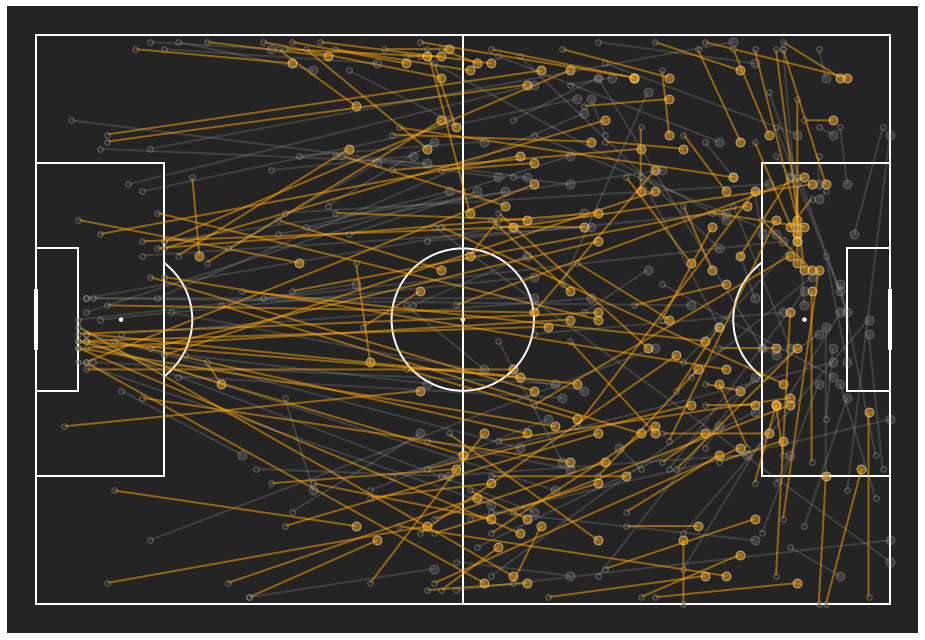

In [273]:
# plot passes attempted wit Giroud as receiver (✔️| ❌)
pitch = Pitch(pitch_color='#242424', line_color='white',stripe=False,figsize=(16, 9))
fig, ax = pitch.draw()

# change line color for success
line_color = lambda x: '#B4B4B5' if x!='success' else '#ffa600'
line_alpha = lambda x: 0.2 if x!='success' else 0.5
for row in matches.query("pass_recipient_name=='Olivier Giroud'").fillna('success').itertuples():
    # plot pass
    pitch.lines(row.location[0], row.location[1],row.pass_end_location[0],row.pass_end_location[1],
                        lw=2, 
                        color=line_color(row.pass_outcome_name),
                        # ls = line_style(possession.loc[i,'type_name']),
                        alpha=line_alpha(row.pass_outcome_name),
                        # transparent=True, 
                        # comet=True, 
                        # cmap='jet',
                        # label= possession.loc[i,'type_name'], #'pass leading to shot', 
                        ax=ax)
    # plot start
    pitch.scatter(row.location[0], row.location[1], s=30, alpha=0.3,
                edgecolors='white', c='#22312b', zorder=2, ax=ax)
    # plot end
    pitch.scatter(row.pass_end_location[0],row.pass_end_location[1], s=80, alpha=line_alpha(row.pass_outcome_name),
                edgecolors='white', c=line_color(row.pass_outcome_name), zorder=2, ax=ax)

In [305]:
matches.fillna({'pass_outcome_name':'success'}).query("pass_recipient_name=='Olivier Giroud'")['pass_outcome_name'].value_counts(dropna=False, normalize=True)
successful_passes = matches.fillna({'pass_outcome_name':'success'}).query("pass_recipient_name=='Olivier Giroud' & pass_outcome_name=='success'")


for i,row in successful_passes.iterrows():
    m = matches.query("possession==@row.possession & match_id==@row.match_id & possession_team_name==@row.possession_team_name").loc[i+1:]
    print (i, m.type_name.to_list())

    # plot the remaining possession trace of these 150 successful giroud receives
#     break
#     print(matches.query("possession==@row.possession").loc[i:,'type_name'].to_list())
# m

e', 'Pass', 'Ball Receipt*', 'Block', 'Ball Recovery', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pass']
11017 ['Pass', 'Pressure', 'Ball Receipt*', 'Carry', 'Miscontrol']
11087 ['Pass', 'Ball Receipt*', 'Pass', 'Ball Receipt*', 'Pass', 'Ball Receipt*', 'Ball Recovery', 'Pressure', 'Ball Recovery', 'Carry', 'Pressure', 'Foul Committed', 'Foul Won']
11853 ['Pass', 'Ball Receipt*', 'Carry', 'Miscontrol', 'Clearance']
11938 ['Pass', 'Pressure', 'Ball Receipt*', 'Carry', 'Miscontrol']
12015 ['Pass', 'Ball Receipt*', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*']
12079 ['Pass', 'Pressure', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Pressure', 'Ball Receipt*', 'Carry', 'Dispossessed']
12138 ['Pass', 'Ball Receipt*', 'Pass', 'Ball Receipt*', 'Carry', 'Miscontrol']
12486 ['Pass', 'Ball Receipt*', 'Carry', 'Dispossessed', 'Duel', 'Ball Recovery', 'Carry', 'Pressure', 'Pass', 'Ball Receipt*', 'Carry', 'Pressure'

In [315]:
m
# successful_passes.tail()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,under_pressure,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,counterpress,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_backheel,shot_first_time,foul_committed_advantage,foul_won_advantage,foul_won_defensive,pass_cross,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_through_ball,pass_technique_id,pass_technique_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,shot_deflected,block_deflection,dribble_nutmeg,dribble_overrun,ball_recovery_recovery_failure,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain,foul_committed_offensive,foul_committed_penalty,foul_won_penalty,foul_committed_type_id,foul_committed_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_aerial_won,pass_deflected,match_id,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,pass_cut_back,ball_recovery_offensive,block_offensive,pass_miscommunication,pass_goal_assist,shot_redirect,miscontrol_aerial_won
23577,41b679c6-a761-4b75-b8a1-b6efff19ea10,2479,2,00:33:27.667,78,27,153,NaN,42,Ball Receipt*,771,France,1,Regular Play,771,France,NaN,NaN,[ded133e8-11c1-4d33-828e-cf8d0f0b2747],"[45.0, 69.0]",3604.0,Olivier Giroud,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23578,1d469ba1-f0d3-4c85-bcd3-b72d5eb12aa1,2480,2,00:33:27.667,78,27,153,1.053,30,Pass,771,France,1,Regular Play,771,France,NaN,NaN,"[648eb393-9c1c-4041-a0fd-6e18b41f4190, be14a7b...","[45.0, 69.0]",3604.0,Olivier Giroud,24.0,Left Center Forward,5487.0,Antoine Griezmann,9.219544,1.352127,2.0,Low Pass,"[47.0, 78.0]",70.0,Other,NaN,NaN,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23579,be14a7bd-5afd-4873-b0f2-87ed1446a68f,2481,2,00:33:28.720,78,28,153,NaN,42,Ball Receipt*,771,France,1,Regular Play,771,France,NaN,NaN,[1d469ba1-f0d3-4c85-bcd3-b72d5eb12aa1],"[47.0, 77.0]",5487.0,Antoine Griezmann,22.0,Right Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

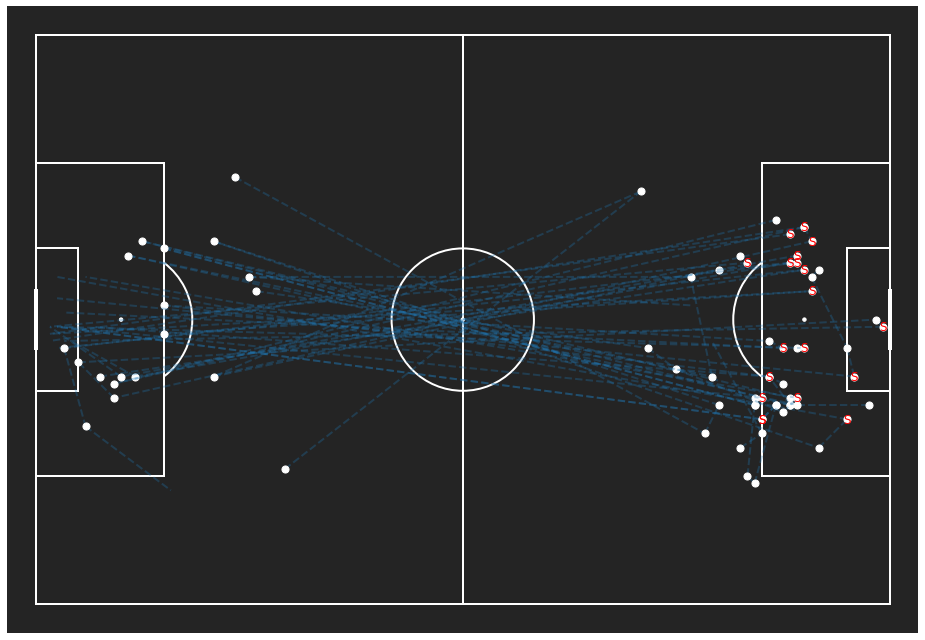

In [323]:
pitch = Pitch(pitch_color='#242424', line_color='white',stripe=False,figsize=(16, 9))
fig, ax = pitch.draw()

# change line color for success
line_color = lambda x: '#B4B4B5' if x!='success' else '#ffa600'
line_alpha = lambda x: 0.2 if x!='success' else 0.5
for i,row in successful_passes.iterrows():
    m = matches.query("possession==@row.possession & match_id==@row.match_id & possession_team_name==@row.possession_team_name").loc[i+1:]
    # print (len(m))
    if len(m)>10:continue
    if 'Shot' not in m.type_name.to_list():continue
    for i in m.index:
        
        try:
            if m.loc[i,'location'][0]==m.loc[i+1,'location'][0]: continue
            # print (possession.loc[i,'type_name'],line_style(possession.loc[i,'type_name']))
            pitch.lines(m.loc[i,'location'][0], m.loc[i,'location'][1], m.loc[i+1,'location'][0], m.loc[i+1,'location'][1],
                        lw=2, 
                        ls = '--',
                        alpha=0.3,
                        # transparent=True, 
                        # comet=True, 
                        # cmap='jet',
                        # label= possession.loc[i,'type_name'], #'pass leading to shot', 
                        ax=ax)
            
            pitch.scatter(m.loc[i,'location'][0], m.loc[i,'location'][1], s=50,
            edgecolors='white', c='white', zorder=2, ax=ax)
            if m.loc[i,'type_name']=='Shot':
                pitch.annotate('S', (m.loc[i,'location'][0], m.loc[i,'location'][1]),
                    va='center', ha='center', color='red', fontsize=12, ax=ax)
            # pitch.scatter(m.loc[i+1,'location'][0], m.loc[i+1,'location'][1], s=50,
            # edgecolors='white', c='#fe98b6', zorder=2, ax=ax)
        except:
            pass

In [270]:
print(matches.query("pass_recipient_name=='Olivier Giroud'").groupby(['position_name'])['pass_outcome_name'].value_counts(dropna=False))
print(matches.query("pass_recipient_name=='Olivier Giroud'").fillna('success').groupby(['pass_type_name'])['pass_outcome_name'].value_counts())
print(matches.query("pass_recipient_name=='Olivier Giroud'").fillna('success').groupby(['pass_height_name'])['pass_outcome_name'].value_counts())

position_name              pass_outcome_name
Center Attacking Midfield  Incomplete           12
                           NaN                   7
Goalkeeper                 NaN                  30
                           Incomplete           17
                           Unknown               3
                           Out                   1
Left Back                  NaN                  25
                           Incomplete           11
Left Center Back           NaN                  11
                           Incomplete            3
                           Out                   1
                           Unknown               1
Left Center Midfield       NaN                  10
                           Incomplete            9
Left Defensive Midfield    NaN                   3
                           Incomplete            3
Left Midfield              NaN                   3
                           Incomplete            1
Left Wing                  NaN       

In [171]:
for i in passes.query('pass_outcome_name != "Incomplete" & possession_team_name=="France"').index:
    df = matches.iloc[i-5:i+5]
    break
df#.dropna(axis=1)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,under_pressure,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,counterpress,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_backheel,shot_first_time,foul_committed_advantage,foul_won_advantage,foul_won_defensive,pass_cross,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_through_ball,pass_technique_id,pass_technique_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,shot_deflected,block_deflection,dribble_nutmeg,dribble_overrun,ball_recovery_recovery_failure,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain,foul_committed_offensive,foul_committed_penalty,foul_won_penalty,foul_committed_type_id,foul_committed_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_aerial_won,pass_deflected,match_id,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,pass_cut_back,ball_recovery_offensive,block_offensive,pass_miscommunication,pass_goal_assist,shot_redirect,miscontrol_aerial_won
2898,5f125003-b2ef-4d69-a4fd-dda8ab086ad0,2899,2,00:34:35.453,79,35,145,0.906,17,Pressure,771,France,1,Regular Play,792,Australia,NaN,NaN,"[1c6a12bb-5e43-45d9-bf8b-a8a646c01dd9, ccb89c3...","[38.0, 64.0]",5490.0,Jackson Irvine,19.0,Center Attacking Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2899,1c6a12bb-5e43-45d9-bf8b-a8a646c01dd9,2900,2,00:34:35.533,79,35,145,NaN,42,Ball Receipt*,771,France,1,Regular Play,771,France,NaN,NaN,"[5f125003-b2ef-4d69-a4fd-dda8ab086ad0, aafe924...","[84.0, 17.0]",3009.0,Kylian Mbappé Lottin,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2900,ccb89c33-fbba-4e97-ae01-5c1fcfbad553,2901,2,00:34:35.533,79,35,145,0.907,43,Carry,771,France,1,Regular Play,771,France,NaN,NaN,"[1c6a12bb-5e43-45d9-bf8b-a8a646c01dd9, 386af8a...","[84.0, 17.0]",3009.0,Kylian Mbappé Lottin,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[91.0, 17.0]",NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7530,NaN,N

In [216]:
matches.query("match_id==8649 & possession_team_name=='France'").groupby(['possession'])['location'].apply(lambda x:list(x)[-1]).dropna()

possession
3        [89.0, 2.0]
6       [80.0, 33.0]
8       [57.0, 76.0]
9       [49.0, 43.0]
13      [25.0, 16.0]
           ...      
176     [86.0, 57.0]
177     [38.0, 24.0]
180     [95.0, 77.0]
184     [26.0, 42.0]
186    [116.0, 43.0]
Name: location, Length: 92, dtype: object

In [217]:
matches.query("match_id==8649 & shot_outcome_name=='Goal'")

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,under_pressure,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,counterpress,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_backheel,shot_first_time,foul_committed_advantage,foul_won_advantage,foul_won_defensive,pass_cross,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_through_ball,pass_technique_id,pass_technique_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,shot_deflected,block_deflection,dribble_nutmeg,dribble_overrun,ball_recovery_recovery_failure,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain,foul_committed_offensive,foul_committed_penalty,foul_won_penalty,foul_committed_type_id,foul_committed_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_aerial_won,pass_deflected,match_id,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,pass_cut_back,ball_recovery_offensive,block_offensive,pass_miscommunication,pass_goal_assist,shot_redirect,miscontrol_aerial_won
1540,4e28dbdf-fd9a-48a7-bc5c-570c5b68a8e4,1541,1,00:39:29.320,39,29,76,0.813,16,Shot,771,France,3,From Free Kick,771,France,NaN,NaN,[8c807f48-3c8e-45e2-b92b-47f64b4d64a8],"[109.0, 44.0]",5485.0,Raphaël Varane,3.0,Right Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058045,"[120.0, 36.6, 1.3]",111ec957-f06e-4b6b-a5e9-b88c7261584e,87.0,Open Play,37.0,Head,97.0,Goal,93.0,Normal,"[{'location': [105.0, 49.0], 'player': {'id': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2255,b708a93c-5b7b-4da1-94b5-59b013bd75ac,2256,2,00:15:46.787,60,46,131,2.213,16,Shot,771,France,1,Regular Play,771,France,NaN,NaN,[4f73e7b0-581f-4410-84a5-8cc890ac7475],"[97.0, 21.0]",5487.0,Antoine Griezmann,19.0,Center Attacking Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019058,"[120.0, 40.9, 1.6]",5adedb40-e0d3-47ac-a26d-732bae20d4c6,87.0,Open Play,38.0,Left Foot,97.0,Goal,93.0,Normal,"[{'location': [80.0, 54.0], 'player': {'id': 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [220]:
for i, possession in matches.query("match_id==8649 & possession_team_name=='France'").groupby(['possession']):
    # if possession.type_name.iloc[-1]=='Shot':
    # if possession.shot_outcome_name.iloc[-1]=='Goal':
        # print (possession.shot_outcome_name)
        print (possession.type_name.to_list())

*', 'Pass', 'Ball Receipt*', 'Shot', 'Goal Keeper']
['Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Pass', 'Block']
['Pass', 'Ball Receipt*', 'Duel', 'Pass']
['Pass', 'Pressure', 'Ball Receipt*', 'Carry', 'Pass', 'Pressure', 'Ball Receipt*', 'Carry', 'Foul Committed', 'Foul Won']
['Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Pressure', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Shot', 'Goal Keeper']
['Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Pass', 'Ball Receipt*', 'Pass', 'Pressure', 'Ball Receipt*', 'Pass', 'Ball Receipt*', 'Carry', 'Pass', 'Ball Receipt*', 'Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Pass', 'Ball Receipt*', 'Pass', 'Pressure', 'Ball Receipt

In [221]:
possession

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,under_pressure,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,counterpress,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_backheel,shot_first_time,foul_committed_advantage,foul_won_advantage,foul_won_defensive,pass_cross,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_through_ball,pass_technique_id,pass_technique_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,shot_deflected,block_deflection,dribble_nutmeg,dribble_overrun,ball_recovery_recovery_failure,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain,foul_committed_offensive,foul_committed_penalty,foul_won_penalty,foul_committed_type_id,foul_committed_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_aerial_won,pass_deflected,match_id,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,pass_cut_back,ball_recovery_offensive,block_offensive,pass_miscommunication,pass_goal_assist,shot_redirect,miscontrol_aerial_won
3366,91b8df0d-44a8-460f-a527-e28de7add6c8,3367,2,00:49:40.160,94,40,187,NaN,23,Goal Keeper,771,France,8,From Keeper,771,France,NaN,NaN,[ad835106-956c-40d1-814f-68f1d13efc89],"[4.0, 38.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Collected,15.0,Success,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3367,7a3529e7-d3ef-42da-b27c-71ed82c047a5,3368,2,00:49:40.160,94,40,187,10.347,43,Carry,771,France,8,From Keeper,771,France,NaN,NaN,"[1a54050e-c3dc-4608-9804-44dc94b3e2d2, 91b8df0...","[4.0, 38.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[12.0, 37.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3368,1a54050e-c3dc-4608-9804-44dc94b3e2d2,3369,2,00:49:50.507,94,50,187,1.453,30,Pass,771,France,8,From Keeper,771,France,NaN,NaN,[8b282bfd-1157-4965-b220-eaa01447b57c],"[12.0, 37.0]",3099.0,Hugo Lloris,1.0,Goalkeeper,20004.0,Paul Pogba,26.305893,0.152649,3.0,High Pass,"[38.0, 41.0]",69.0,Keeper Arm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [228]:
for i in possession.query("team_name=='France'").index:
    try:
        print (possession.loc[i,'location'][0], possession.loc[i,'location'][1], possession.loc[i+1,'location'][0], possession.loc[i+1,'location'][1],possession.loc[i,'player_name'], possession.loc[i,'type_name'])
    except:
        pass

4.0 38.0 4.0 38.0 Hugo Lloris Goal Keeper
4.0 38.0 12.0 37.0 Hugo Lloris Carry
12.0 37.0 38.0 41.0 Hugo Lloris Pass
38.0 41.0 38.0 41.0 Paul Pogba Ball Receipt*
38.0 41.0 83.0 46.0 Paul Pogba Carry
45.0 35.0 35.0 16.0 Paul Pogba Pass


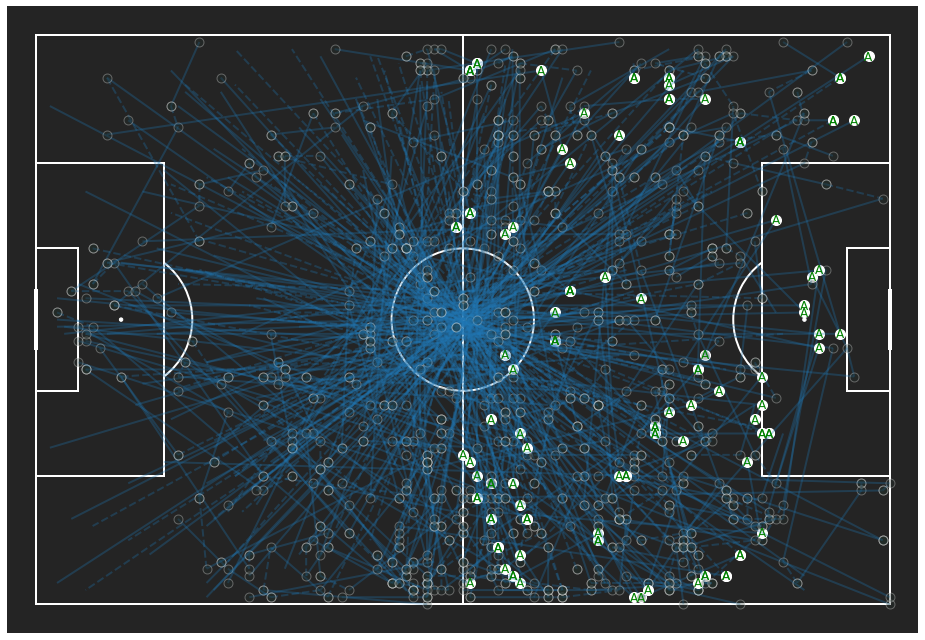

In [252]:

pitch = Pitch(pitch_color='#242424', line_color='white',stripe=False,figsize=(16, 9))
fig, ax = pitch.draw()
line_style = lambda x: '--' if x=='Carry' else '-'

for k, possession in matches.query("match_id==8649 & possession_team_name=='France'").groupby(['possession']):
    # if Giroud is part of the trace, continue
    if 'Olivier Giroud' not in possession.player_name.unique():continue
    # plot the possession trace
    for i in possession.query("team_name=='France'").index:
        try:
            # print (possession.loc[i,'type_name'],line_style(possession.loc[i,'type_name']))
            pitch.lines(possession.loc[i,'location'][0], possession.loc[i,'location'][1], possession.loc[i+1,'location'][0], possession.loc[i+1,'location'][1],
                        lw=2, 
                        ls = line_style(possession.loc[i,'type_name']),
                        alpha=0.3,
                        # transparent=True, 
                        # comet=True, 
                        # cmap='jet',
                        # label= possession.loc[i,'type_name'], #'pass leading to shot', 
                        ax=ax)
            if possession.loc[i,'player_name']!= 'Olivier Giroud':
                pitch.scatter(possession.loc[i,'location'][0], possession.loc[i,'location'][1], s=80, alpha=0.3,
                edgecolors='white', c='#22312b', zorder=2, ax=ax)
            elif possession.loc[i,'player_name']== 'Antoine Griezmann':
                pitch.scatter(possession.loc[i,'location'][0], possession.loc[i,'location'][1], s=100,
                edgecolors='white', c='white', zorder=2, ax=ax)
                pitch.annotate('A', (possession.loc[i,'location'][0], possession.loc[i,'location'][1]),
                   va='center', ha='center', color='green', fontsize=12, ax=ax)
            else:
                pitch.scatter(possession.loc[i,'location'][0], possession.loc[i,'location'][1], s=100,
                edgecolors='white', c='white', zorder=2, ax=ax)
                pitch.annotate('G', (possession.loc[i,'location'][0], possession.loc[i,'location'][1]),
                   va='center', ha='center', color='red', fontsize=12, ax=ax)
        except:
            pass
    # ax.legend();
    # break


In [239]:
possession

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,under_pressure,ball_receipt_outcome_id,ball_receipt_outcome_name,duel_type_id,duel_type_name,pass_aerial_won,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_freeze_frame,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_position_id,goalkeeper_position_name,counterpress,dribble_outcome_id,dribble_outcome_name,duel_outcome_id,duel_outcome_name,pass_backheel,shot_first_time,foul_committed_advantage,foul_won_advantage,foul_won_defensive,pass_cross,goalkeeper_end_location,interception_outcome_id,interception_outcome_name,pass_through_ball,pass_technique_id,pass_technique_name,shot_aerial_won,foul_committed_card_id,foul_committed_card_name,shot_deflected,block_deflection,dribble_nutmeg,dribble_overrun,ball_recovery_recovery_failure,50_50_outcome_id,50_50_outcome_name,injury_stoppage_in_chain,foul_committed_offensive,foul_committed_penalty,foul_won_penalty,foul_committed_type_id,foul_committed_type_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,clearance_aerial_won,pass_deflected,match_id,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,shot_open_goal,pass_cut_back,ball_recovery_offensive,block_offensive,pass_miscommunication,pass_goal_assist,shot_redirect,miscontrol_aerial_won
15,a021d9a0-e2fe-49ad-b34b-e6fd1071390d,16,1,00:00:14.133,0,14,3,1.680,30,Pass,771,France,4,From Throw In,771,France,NaN,NaN,[78de46ed-68c9-4658-ae75-2affedc3a6a8],"[55.0, 80.0]",5476.0,Benjamin Pavard,2.0,Right Back,5485.0,Raphaël Varane,23.086792,-3.054854,2.0,Low Pass,"[32.0, 78.0]",NaN,NaN,67.0,Throw-in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,78de46ed-68c9-4658-ae75-2affedc3a6a8,17,1,00:00:15.813,0,15,3,NaN,42,Ball Receipt*,771,France,4,From Throw In,771,France,NaN,NaN,[a021d9a0-e2fe-49ad-b34b-e6fd1071390d],"[32.0, 78.0]",5485.0,Raphaël Varane,3.0,Right Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,8f91dcbc-3020-45ee-a372-4f264e035799,18,1,00:00:15.813,0,15,3,5.520,43,Carry,771,France,4,From Throw In,771,France,NaN,NaN,"[78de46ed-68c9-4658-ae75-2affedc3a6a8, bd51b9b...","[32.0, 78.0]",5485.0,Raphaël Varane,3.0,Right Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[33.0, 72.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8649,NaN,NaN,NaN,NaN,NaN,NaN,N

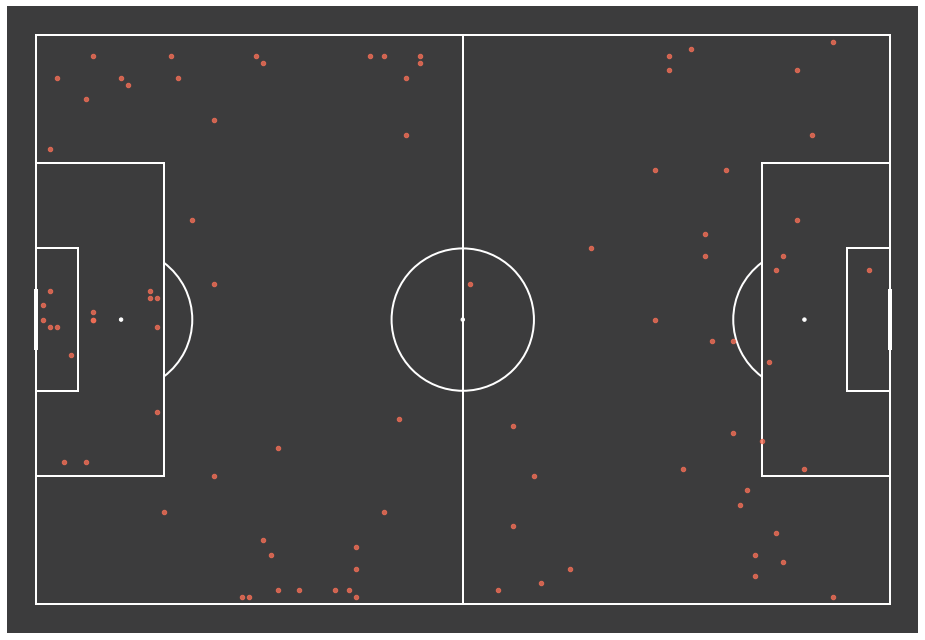

In [215]:
# matches.query('possession==146 & match_id==7530').groupby('timestamp')['player_name', 'type_name'].to_dict()
pitch = Pitch(pitch_color='#3C3C3D', line_color='white',stripe=False,figsize=(16, 9))
fig, ax = pitch.draw()
# Plot the receipts
color =  lambda x: 'blue' if x!="Incomplete" else 'red'
for row in matches.query("match_id==8649 & possession_team_name=='France'").groupby(['possession'])['location'].apply(lambda x:list(x)[-1]).dropna():
    sc1 = pitch.scatter(row[0], row[1], s=20, alpha=0.8, c='#f36f57', ax=ax)

## Load matches for WWC'19

In [53]:
# load match data for womens world cup: #competition id 72
matches = pd.DataFrame()
for MATCH_FILE in glob.glob('../datahub/statsbomb/open-data/data/matches/{}/*'.format(competitions.query("competition_name.str.contains(\"Women's World\")")['competition_id'].item())):
    matches = pd.concat([matches, pd.DataFrame.from_records(json.load(open(MATCH_FILE)))])
matches.sample(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
4,22930,2019-06-08,18:00:00.000,"{'competition_id': 72, 'country_name': 'Intern...","{'season_id': 30, 'season_name': '2019'}","{'home_team_id': 863, 'home_team_name': 'Spain...","{'away_team_id': 1216, 'away_team_name': 'Sout...",3,1,available,2019-12-16T23:09:16.168756,"{'data_version': '1.1.0', 'shot_fidelity_versi...",1,"{'id': 1, 'name': 'Regular Season'}",NaN,NaN
49,69205,2019-06-29,15:00:00.000,"{'competition_id': 72, 'country_name': 'Intern...","{'season_id': 30, 'season_name': '2019'}","{'home_team_id': 855, 'home_team_name': 'Italy...","{'away_team_id': 851, 'away_team_name': 'Nethe...",0,2,available,2019-12-16T23:09:16.168756,"{'data_version': '1.1.0', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 231, 'name': 'Stade du Hainaut', 'count...","{'id': 1632, 'name': 'C. Umpiérrez'}"
1,68357,2019-06-22,21:00:00.000,"{'competition_id': 72, 'country_name': 'Intern...","{'season_id': 30, 'season_name': '2019'}","{'home_team_id': 852, 'home_team_name': 'Norwa...","{'away_team_id': 1205, 'away_team_name': 'Aust...",1,1,available,2020-02-27T12:19:39.458017,"{'data_version': '1.1.0', 'shot_fidelity_versi...",4,"{'id': 1, 'name': 'Regular Season'}",NaN,NaN


In [54]:
# expand columns having dict objects to new cols
for column in ['competition','season','home_team','away_team','competition_stage','metadata']:
    matches = matches.drop(column, 1).assign(**pd.DataFrame(matches[column].values.tolist()))
# matches = matches.drop('country', 1).assign(**pd.DataFrame(matches['country'].values.tolist()), coerce=True)

## Print the results of WWC'19

In [45]:
for i,row in matches.iterrows():
    print('{} \t{}:{}\t {}'.format(row['home_team_name'],row['home_score'],row['away_score'], row['away_team_name']))
# matches.apply(lambda row: , axis=1)

Scotland Women's 	3:3	 Argentina Women's
Norway Women's 	1:1	 Australia Women's
Spain Women's 	1:2	 United States Women's
Sweden Women's 	1:0	 Canada Women's
Spain Women's 	3:1	 South Africa Women's
Germany Women's 	1:0	 China PR Women's
Brazil Women's 	3:0	 Jamaica Women's
England Women's 	2:1	 Scotland Women's
Australia Women's 	1:2	 Italy Women's
Argentina Women's 	0:0	 Japan Women's
Canada Women's 	1:0	 Cameroon Women's
Chile Women's 	0:2	 Sweden Women's
New Zealand Women's 	0:1	 Netherlands Women's
United States Women's 	13:0	 Thailand Women's
Nigeria Women's 	2:0	 Korea Republic Women's
Germany Women's 	1:0	 Spain Women's
France Women's 	2:1	 Norway Women's
Australia Women's 	3:2	 Brazil Women's
South Africa Women's 	0:1	 China PR Women's
Japan Women's 	2:1	 Scotland Women's
United States Women's 	3:0	 Chile Women's
Sweden Women's 	5:1	 Thailand Women's
Nigeria Women's 	0:1	 France Women's
South Africa Women's 	0:4	 Germany Women's
China PR Women's 	0:0	 Spain Women's
Korea Repub

In [46]:
MATCH_ID = matches.query("home_team_name.str.startswith('England') & away_team_name.str.startswith('Sweden')")['match_id'].item()
print ('Match ID for ENG vs SWE at WWC19: {}'.format(MATCH_ID))

Match ID for ENG vs SWE at WWC19: 69301


#Exercise: 
#1, Edit the code above to print out the result list for the Mens World cup 
#2, Edit the code above to find the ID for England vs. Sweden
#3, Write new code to write out a list of just Sweden's results in the tournament.

# Men's world cup results

In [47]:
# load match data for womens world cup: #competition id 72
matches = pd.DataFrame()
for MATCH_FILE in glob.glob('../datahub/statsbomb/open-data/data/matches/{}/*'.format(competitions.query("competition_name.str.contains(\"FIFA World\")")['competition_id'].item())):
    matches = pd.concat([matches, pd.DataFrame.from_records(json.load(open(MATCH_FILE)))])

# expand columns having dict objects to new cols
for column in ['competition','season','home_team','away_team','competition_stage','metadata']:
    matches = matches.drop(column, 1).assign(**pd.DataFrame(matches[column].values.tolist()))

for i,row in matches.iterrows():
    print('{} \t{}:{}\t {}'.format(row['home_team_name'],row['home_score'],row['away_score'], row['away_team_name']))

Australia 	0:2	 Peru
Nigeria 	2:0	 Iceland
Serbia 	0:2	 Brazil
Croatia 	1:1	 Denmark
Iran 	1:1	 Portugal
Mexico 	0:3	 Sweden
Brazil 	2:0	 Costa Rica
Germany 	0:1	 Mexico
Portugal 	3:3	 Spain
Russia 	3:1	 Egypt
Switzerland 	2:2	 Costa Rica
Panama 	1:2	 Tunisia
England 	0:1	 Belgium
France 	1:0	 Belgium
Belgium 	2:0	 England
Iran 	0:1	 Spain
Uruguay 	3:0	 Russia
Croatia 	2:0	 Nigeria
Brazil 	1:2	 Belgium
France 	1:0	 Peru
Tunisia 	1:2	 England
France 	4:3	 Argentina
Argentina 	0:3	 Croatia
Belgium 	3:0	 Panama
France 	2:1	 Australia
Costa Rica 	0:1	 Serbia
Belgium 	3:2	 Japan
Uruguay 	0:2	 France
Sweden 	1:0	 South Korea
Brazil 	1:1	 Switzerland
Spain 	2:2	 Morocco
Russia 	5:0	 Saudi Arabia
Peru 	0:1	 Denmark
Poland 	0:3	 Colombia
Senegal 	0:1	 Colombia
Russia 	2:2	 Croatia
South Korea 	1:2	 Mexico
Saudi Arabia 	2:1	 Egypt
Morocco 	0:1	 Iran
Poland 	1:2	 Senegal
Serbia 	1:2	 Switzerland
Japan 	2:2	 Senegal
Iceland 	1:2	 Croatia
Sweden 	1:0	 Switzerland
Denmark 	0:0	 France
Uruguay 	2:1	 

In [49]:
MATCH_ID = matches.query("away_team_name.str.startswith('England') & home_team_name.str.startswith('Sweden')")['match_id'].item()
print ('Match ID for SWE vs ENG at WC18: {}'.format(MATCH_ID))

Match ID for SWE vs ENG at WC18: 8651


## SWE's results at WC18

In [52]:
swe_matches = matches.query("(home_team_name==\"Sweden\") or (away_team_name==\"Sweden\")")
for i,row in swe_matches.iterrows():
    print('{} \t{}:{}\t {}'.format(row['home_team_name'],row['home_score'],row['away_score'], row['away_team_name']))

Mexico 	0:3	 Sweden
Sweden 	1:0	 South Korea
Sweden 	1:0	 Switzerland
Sweden 	0:2	 England
Germany 	2:1	 Sweden
